In [66]:
import pandas as pd
import numpy as np
import os
%run 'functions_dump.py'
% matplotlib inline

In [67]:
def find_folder_upstream(folder_name, max_iterations=50):
    current_folder = os.getcwd()
    counter = 0
    while os.path.basename(current_folder) != folder_name and counter < max_iterations:
        current_folder = os.path.dirname(current_folder)
        counter += 1
    if not counter < max_iterations:
        return None
    return current_folder

root_folder_name = 'HIS3InterspeciesEpistasis'
root_folder = find_folder_upstream(root_folder_name)
if not root_folder:
    print 'Did not find root folder for our github repository.\nPlease run "ks01" notebook from a script inside the HIS3InterspeciesEpistasis folder!'

data_folder = os.path.join(root_folder, 'Data', '')
small_tables_folder = os.path.join(root_folder, 'Data_Small_Tables', '')
analysis_folder = os.path.join(root_folder, 'Analysis', '')
karen_folder = os.path.join(analysis_folder, 'Karen', '')
figures_folder = os.path.join(karen_folder, 'figures', '')
files_dump_folder = os.path.join(karen_folder, 'files_dump', '')
structure_predictions_folder = os.path.join(files_dump_folder, 'structure_predictions', '')
structure_visualizations_folder = os.path.join(files_dump_folder, 'structure_visualizations', '')
pymol_sessions_folder = os.path.join(files_dump_folder, 'structure_visualizations/pymol_sessions/', '')

In [68]:
structural_data = pd.read_hdf(files_dump_folder + 'structural_data_for_predicted_24mer.hdf', 'data')

In [69]:
%run 'ks23_Read_Lucas_sign_epistasis_data.ipynb'

94 positions under sign epistasis
59 positions under reciprocal sign epistasis
Pandas DataFrames available:
lucas_sign_epistasis, lucas_reciprocal_sign_epistasis

pBon threshold = 0.01
The following sets of positions are available:
all_sampled_positions, sign_epistasis_positions, reciprocal_sign_epistasis_positions


In [70]:
def get_distance_from_structural_data_table(df):
    VarPos_absolute, SubPos_absolute = df[['VarPos_absolute', 'SubPos_absolute']]
    try:
        distance = structural_data.loc['res_%s' %VarPos_absolute]['res_%s' %SubPos_absolute]
        return distance
    except KeyError:
        return None

lucas_sign_epistasis['distance'] = lucas_sign_epistasis.apply(get_distance_from_structural_data_table, axis=1)
lucas_sign_epistasis[sign_cols + ['distance']][:2]

,VarPos_absolute,SubPos_absolute,pBon,logodds,distance
0,141,143,2.480092e-242,0.009042,4.477087
1,141,143,2.606182e-122,0.031833,4.477087


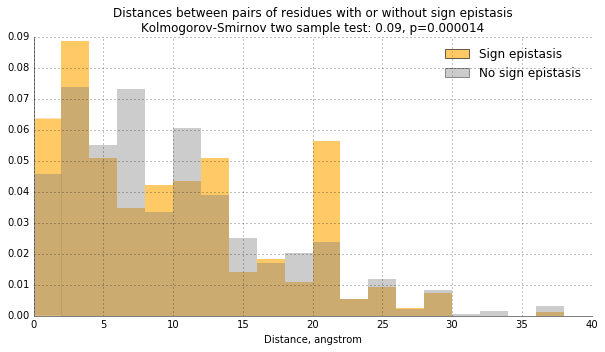

In [71]:
title = 'Distances between pairs of residues with or without sign epistasis'

dist1 = lucas_sign_epistasis[lucas_sign_epistasis.pBon < p_value_threshold]['distance']
dist2 = lucas_sign_epistasis[lucas_sign_epistasis.pBon >= p_value_threshold]['distance']

plot_better()
plt.hist(dist1, alpha=0.6, range=(0,40), normed=True, edgecolor='none', 
         bins=20, color='orange', label='Sign epistasis')
plt.hist(dist2, alpha=0.4, normed=True, range=(0,40), 
         edgecolor='none', bins=20, color='gray', label='No sign epistasis')
KS_test = stats.ks_2samp(dist1, dist2)
plt.title(title + '\n' + 'Kolmogorov-Smirnov two sample test: %.2f, p=%.6f' %(KS_test[0], KS_test[1]))
plt.legend(loc='upper right', frameon=False)
plt.xlabel(u'Distance, angstrom')

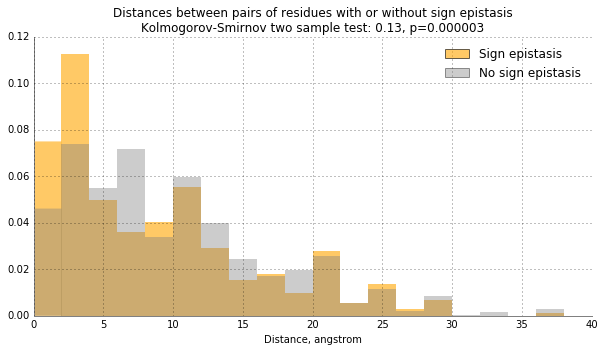

In [72]:
title = 'Distances between pairs of residues with or without sign epistasis'

dist1 = lucas_sign_epistasis[(lucas_sign_epistasis.pBon < p_value_threshold) & (lucas_sign_epistasis.logodds > 1) ]['distance']
dist2 = lucas_sign_epistasis[(lucas_sign_epistasis.pBon >= p_value_threshold) | (lucas_sign_epistasis.logodds < 1)]['distance']

plot_better()
plt.hist(dist1, alpha=0.6, range=(0,40), normed=True, edgecolor='none', 
         bins=20, color='orange', label='Sign epistasis')
plt.hist(dist2, alpha=0.4, normed=True, range=(0,40), 
         edgecolor='none', bins=20, color='gray', label='No sign epistasis')
KS_test = stats.ks_2samp(dist1, dist2)
plt.title(title + '\n' + 'Kolmogorov-Smirnov two sample test: %.2f, p=%.6f' %(KS_test[0], KS_test[1]))
plt.legend(loc='upper right', frameon=False)
plt.xlabel(u'Distance, angstrom')

In [73]:
reciprocal_positions = set.union(set(lucas_reciprocal_sign_epistasis.position1), set(lucas_reciprocal_sign_epistasis.position2))

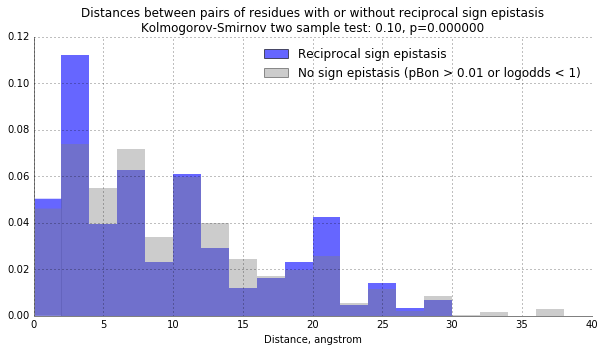

In [74]:
title = 'Distances between pairs of residues with or without reciprocal sign epistasis'

dist1 = lucas_sign_epistasis[lucas_sign_epistasis.VarPos_absolute.isin(reciprocal_positions) & \
                             lucas_sign_epistasis.SubPos_absolute.isin(reciprocal_positions)]['distance']
dist2 = lucas_sign_epistasis[(lucas_sign_epistasis.pBon >= p_value_threshold) | (lucas_sign_epistasis.logodds < 1)]['distance']

plot_better()
plt.hist(dist1, alpha=0.6, range=(0,40), normed=True, edgecolor='none', bins=20, color='blue', label='Reciprocal sign epistasis')
plt.hist(dist2, alpha=0.4, normed=True, range=(0,40), 
         edgecolor='none', bins=20, color='gray', label='No sign epistasis (pBon > 0.01 or logodds < 1)')
KS_test = stats.ks_2samp(dist1, dist2)
plt.title(title + '\n' + 'Kolmogorov-Smirnov two sample test: %.2f, p=%.6f' %(KS_test[0], KS_test[1]))
plt.legend(loc='upper right', frameon=False)
plt.xlabel(u'Distance, angstrom')

In [75]:
lucas_reciprocal_sign_epistasis

,segment,fused_mutations,mutation1,mutation2,position1,position2
0,1,A10EA26S,A10E,A26S,115,131
1,1,A10KA26S,A10K,A26S,115,131
2,1,A10KA5E,A10K,A5E,115,110
3,1,A10KE5H,A10K,E5H,115,110
4,1,A10KE5K,A10K,E5K,115,110
5,1,A10KE5T,A10K,E5T,115,110
6,1,A10KF30L,A10K,F30L,115,135
7,1,A10TL9V,A10T,L9V,115,114
8,1,A26SA10E,A26S,A10E,131,115
9,1,A26SA10K,A26S,A10K,131,115
